In [98]:
import pandas as pd
import numpy as np
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
# import data as pandas data frame, change according to your path
train_data = pd.read_csv("/home/ooa/Belgeler/git/BLG-527/hw3/Data/optdigits.tra", header=None)
test_data = pd.read_csv("/home/ooa/Belgeler/git/BLG-527/hw3/Data/optdigits.tes", header=None)

In [49]:
train_data = train_data.values
test_data = test_data.values

In [66]:
y_train = train_data[:,64]
y_test = test_data[:,64]

In [67]:
X_train = train_data[:,:64]
X_test = test_data[:,:64]

In [117]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

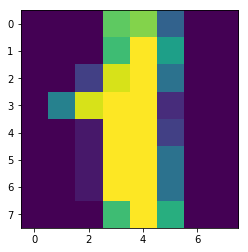

In [127]:
deneme_7 = test_data[1, :64]
deneme_7 = np.reshape(deneme_7, (8,8))
plt.imshow(deneme_7, interpolation='Nearest')
plt.show()

In [69]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [133]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_gini, X_train, y_train,
scoring=None, cv=10)
rmse_scores = np.sqrt(-scores)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


In [134]:
print("Mean:", scores.mean())

Mean: 0.4844735823288172


In [112]:
y_pred = clf_gini.predict(X_test)
y_pred_gini_tr = clf_gini.predict(X_train)

In [108]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en_tr = clf_entropy.predict(X_train)

In [ ]:
clf_randomforest = RandomForestClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_randomforest.fit(X_train, y_train)

In [ ]:
y_pred_rf = clf_randomforest.predict(X_test)
y_pred_rf_tr = clf_randomforest.predict(X_train)

In [113]:
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  38.230383973288816


In [114]:
print ("Accuracy is ", accuracy_score(y_train,y_pred_gini_tr)*100)

Accuracy is  40.91027988490714


In [109]:
print ("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  53.47801892042293


In [111]:
print ("Accuracy is ", accuracy_score(y_train,y_pred_en_tr)*100)

Accuracy is  58.09573633272299


In [103]:
print ("Accuracy is ", accuracy_score(y_test,y_pred_rf)*100)

Accuracy is  79.13188647746243


In [105]:
print ("Accuracy is ", accuracy_score(y_train,y_pred_rf_tr)*100)

Accuracy is  81.37588281454356


In [137]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_cf = RandomForestClassifier()
grid_search = GridSearchCV(forest_cf, param_grid, cv=5,
scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [138]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [139]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [144]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8113145846958797 {'max_features': 2, 'n_estimators': 3}
0.9316546762589928 {'max_features': 2, 'n_estimators': 10}
0.9653368214519293 {'max_features': 2, 'n_estimators': 30}
0.855461085676913 {'max_features': 4, 'n_estimators': 3}
0.9483322432962721 {'max_features': 4, 'n_estimators': 10}
0.973839110529758 {'max_features': 4, 'n_estimators': 30}
0.8754087638979725 {'max_features': 6, 'n_estimators': 3}
0.9532374100719424 {'max_features': 6, 'n_estimators': 10}
0.9758011772400261 {'max_features': 6, 'n_estimators': 30}
0.8721386527141923 {'max_features': 8, 'n_estimators': 3}
0.959123610202747 {'max_features': 8, 'n_estimators': 10}
0.974166121648136 {'max_features': 8, 'n_estimators': 30}
0.8293001962066711 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.9457161543492478 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.8600392413342054 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.9522563767168084 {'bootstrap': False, 'max_features': 3, 'n_est

In [145]:
clf_randomforest2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [146]:
clf_randomforest2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [147]:
y_pred_rf2 = clf_randomforest2.predict(X_test)
y_pred_rf_tr2 = clf_randomforest2.predict(X_train)

In [148]:
print ("Accuracy is ", accuracy_score(y_test,y_pred_rf2)*100)

Accuracy is  96.27156371730662


In [149]:
y_test

array([0, 1, 2, ..., 8, 9, 8])

In [150]:
y_pred_rf2

array([0, 1, 2, ..., 8, 9, 8])